In [1]:
import sympy as sp
import numpy as np
from IPython.display import Math 

sp.init_printing()

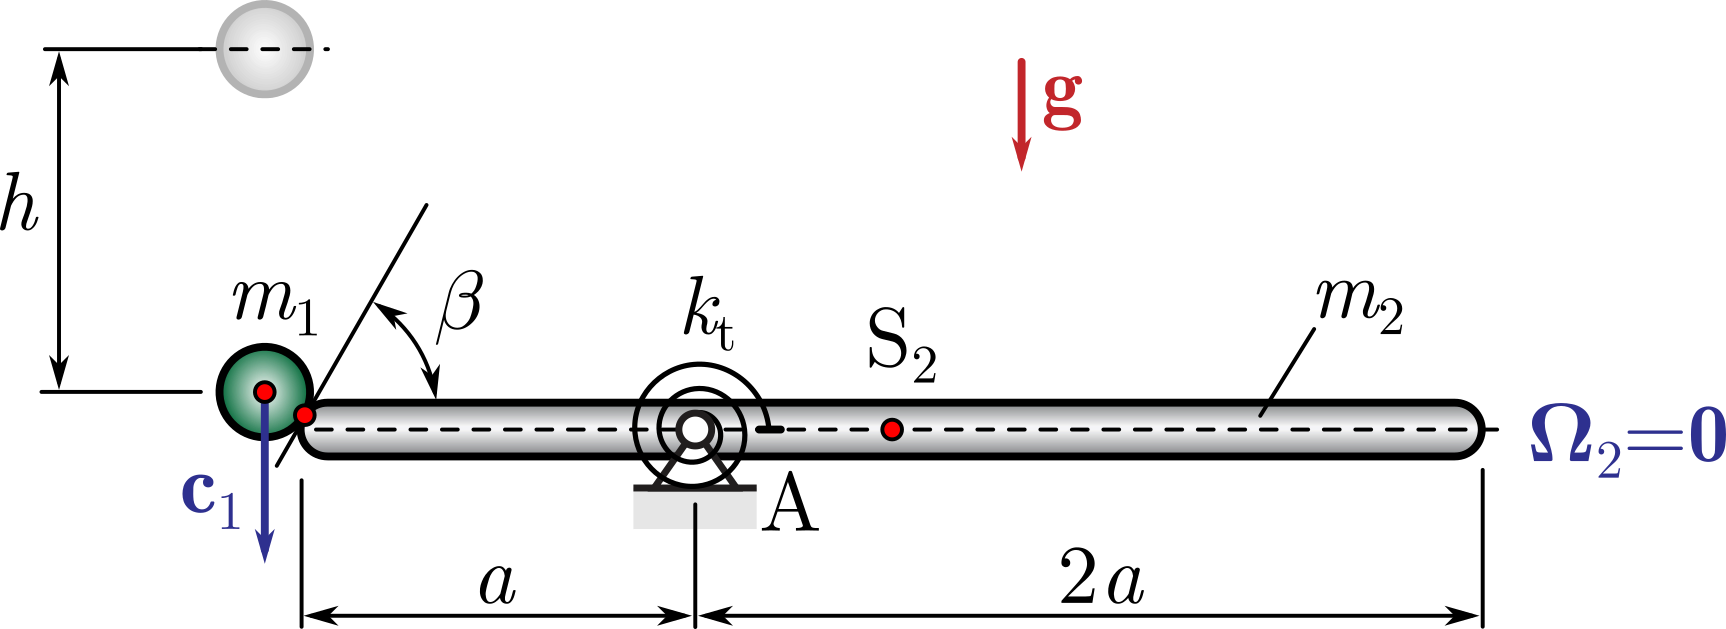

In [2]:
from IPython.display import Image
Image(filename='01.png',width=500)

In [3]:
h, m_1, m_2, e, β, a, g = sp.symbols("h, m_1, m_2, e, β, a, g")

adatok = [(h,0.115), (m_1, 6), (m_2,6), (e,1), (β, sp.pi/3), (a,0.3), (g,9.81)]

A leejtett $m_1$ tömegű test sebességének meghatározása az ütközés pillanata előtt, a munkatétel szerint:
$$T_1 - T_0 = W_{01}$$

ahol $T_0$ a kezdeti kinetikus energia, $T_1$ pedig az ütközés pillanatában a kinetikus energia, $W_{01}$ a mechanikai munka, amit a gravitációs erőtér végez. Mivel $m_1$ tömegű testet 0 kezdősebességgel ejtettük le: $T_0 = 0$
$$\dfrac{1}{2} m_1 c_1 = m_1 g h \longrightarrow c_1 = \sqrt{2 g h}$$

In [4]:
c_1 = sp.sqrt(2*g*h)
display(Math('c_1 = {}'.format(sp.latex(c_1))))

c_1_num = c_1.subs(adatok).evalf(2) #m/s-ban
display(Math('c_1 = {}'.format(c_1_num)))

c_1 = sp.symbols("c_1")
adatok.append((c_1,c_1_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

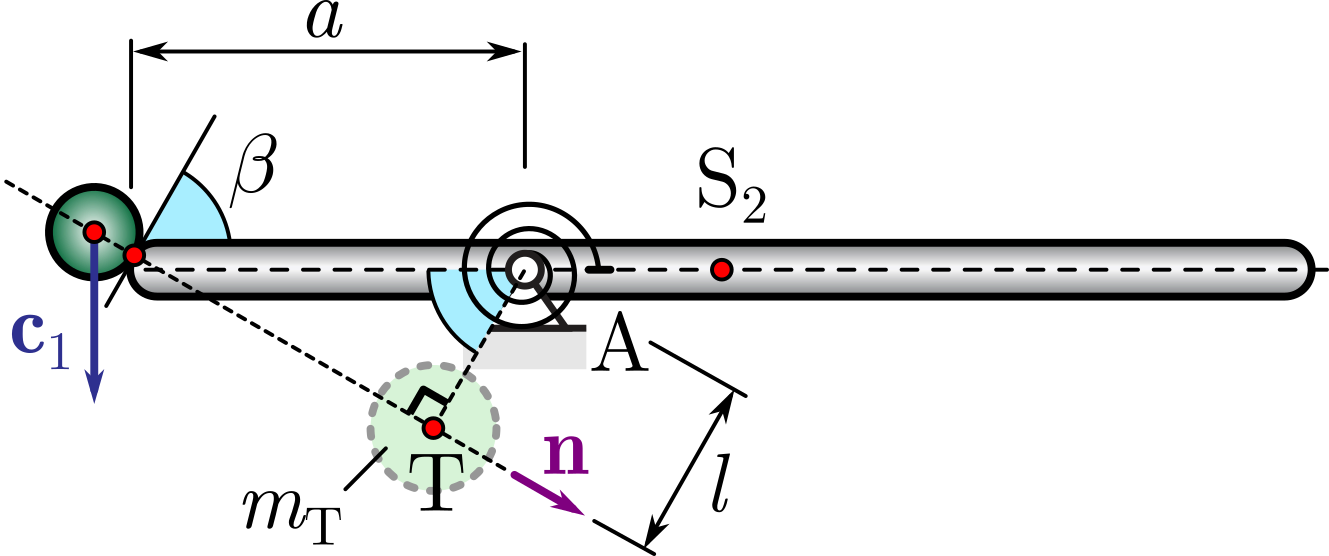

In [5]:
from IPython.display import Image
Image(filename='02.png',width=500)

Az ütközés $m_1$ szempontjából centrikus ütközés, $m_2$ szempontjából álló tengely körül elforduló test ütközése, ezért meg kell keresni az ütközési talppontot, melyet a következőképpen tehetünk meg:
1. Kijelöljük az ütközési normálist.
2. "$A$" pontból (elforduló tengely) merőlegest állítunk $\textbf{n}$ ütközési normálisra

Szükség van a talppont és az álló tengely közötti távolságra, amely: 
$$l = \overline{AT} = a cos(\beta)$$

In [6]:
l = a*sp.cos(β)
display(Math('l = {}'.format(sp.latex(l))))

l_num = l.subs(adatok).evalf(2) #m-ben
display(Math('l = {}'.format(l_num)))

l = sp.symbols("l")
adatok.append((l,l_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A redukált tömeg kiszámításához szükség van a tehetetlenségi nyomatékra, amely az $A$ pontra számolva:
$$\theta_A = \theta_S + \theta_{AS} = \dfrac{1}{12} m_2 (3a)^2 + m_2 \left(\dfrac{3}{2} a - a\right)$$

In [9]:
θ_A = 1/12*m_2*(3*a)**2 + m_2*(3/2*a - a)**2
display(Math('\\theta_A = {}'.format(sp.latex(θ_A)))) # \theta_A nem elég, kettő \\ kell, mivel '\t'-t a Python külön értelmezi
                                                      # + egyből egyszerűsíti a kifejezés
    
θ_A_num = θ_A.subs(adatok).evalf(2)
display(Math('\\theta_A = {}'.format(θ_A_num)))

θ_A = sp.symbols("θ_A") #kgm^2-ben
adatok.append((θ_A,θ_A_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Így a redukált tömeg számítható: 
$$m_T = \dfrac{\theta_A}{l^2}$$

In [11]:
m_T = θ_A / (l**2)
display(Math('m_T = {}'.format(sp.latex(m_T)))) # \theta_A nem elég, kettő \\ kell, mivel '\t'-t a Python külön értelmezi
                                                      # + egyből egyszerűsíti a kifejezés
    
m_T_num = m_T.subs(adatok).evalf(2) #kg-ban
display(Math('m_T = {}'.format(m_T_num)))

m_T = sp.symbols("m_T") 
adatok.append((m_T,m_T_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A golyó mozgásállapota az ütközés előtt: $[\Omega_1; c_1] = [0;1,5]$

A rúd mozgásállapota az ütközés előtt: $[\Omega_2; c_{Tn}] = [0;0]$, mivel $c_{Tn}=\Omega_2 l $ ahol $\Omega_2=0$

In [12]:
c_Tn = sp.symbols("c_Tn")
adatok.append((c_Tn,0))

A $c_1$ sebesség vektor $\textbf{n}$ ütközési normális irányú, és az arra merőleges tangenciális irányú komponense a következőképpen számolható az ábra alapján:

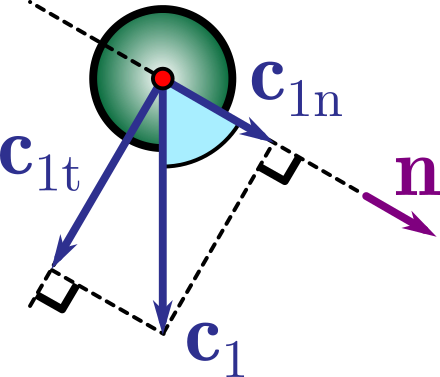

In [13]:
from IPython.display import Image
Image(filename='03.png',width=150)

$$c_{1n} = c_1 cos(\beta)$$

$$c_{1t} = c_1 sin(\beta)$$

In [15]:
c_1n = c_1 * sp.cos(β)
display(Math('c_{{1n}} = {}'.format(sp.latex(c_1n))))

c_1n_num = c_1n.subs(adatok).evalf(2) #m/s-ban
display(Math('c_{{1n}} = {}'.format(c_1n_num)))

c_1n = sp.symbols("c_1n") 
adatok.append((c_1n,c_1n_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
c_1t = c_1 * sp.sin(β)
display(Math('c_{{1t}} = {}'.format(sp.latex(c_1t))))

c_1t_num = c_1t.subs(adatok).evalf(2) #m/s-ban
display(Math('c_{{1t}} = {}'.format(c_1t_num)))

c_1t = sp.symbols("c_1t") 
adatok.append((c_1t,c_1t_num))

<IPython.core.display.Math object>

<IPython.core.display.Math object>